# Import Libraries

In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pyodbc 
import warnings
warnings.filterwarnings("ignore")

# Load and Preview the Data

In [6]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=AHMEDTOEMA\SQLEXPRESS;'
    'DATABASE=DataAnalysis;'
    'Trusted_Connection=yes;'
)

In [7]:
conn = pyodbc.connect(conn_str)

In [21]:
query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)
df.head()

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# Understand the Data Structure

In [22]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Purchase_Amount_USD', 'Location', 'Size', 'Color', 'Season',
       'Review_Rating', 'Subscription_Status', 'Payment_Method',
       'Shipping_Type', 'Discount_Applied', 'Promo_Code_Used',
       'Previous_Purchases', 'Preferred_Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

In [20]:
df.isnull().sum() # no missing values

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

# Clean The Data

In [24]:
df.duplicated().sum() # no duplicate rows

np.int64(0)

In [26]:
print("Sizes:", df['Size'].unique())
print("Colors:", df['Color'].unique())
print("Payment_Methods:", df['Payment_Method'].unique())
print("Gender:", df['Gender'].unique())

Sizes: ['L' 'S' 'M' 'XL']
Colors: ['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal' 'Silver' 'Pink' 'Purple'
 'Olive' 'Gold' 'Violet' 'Teal' 'Lavender' 'Black' 'Green' 'Peach' 'Red'
 'Cyan' 'Brown' 'Beige' 'Orange' 'Indigo' 'Yellow' 'Magenta' 'Blue']
Payment_Methods: ['Credit Card' 'Bank Transfer' 'Cash' 'PayPal' 'Venmo' 'Debit Card']
Gender: ['Male' 'Female']


In [30]:
df[['Age', 'Purchase_Amount_USD', 'Review_Rating']].describe()

,Age,Purchase_Amount_USD,Review_Rating
count,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949
std,15.207589,23.685392,0.716223
min,18.000000,20.000000,2.500000
25%,31.000000,39.000000,3.100000
50%,44.000000,60.000000,3.700000
75%,57.000000,81.000000,4.400000
max,70.000000,100.000000,5.000000


In [253]:
# no outliers
numeric_cols = df.select_dtypes(include='number').columns 

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        print(f"\nOutliers in column '{col}':")
        print(outliers[[col]])

# Explore the Data

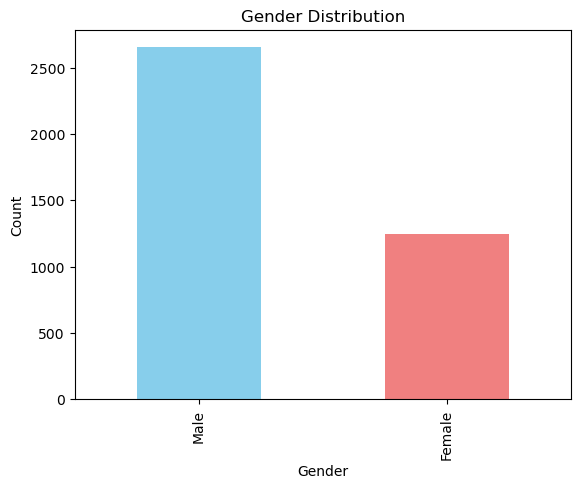

In [49]:
df["Gender"].value_counts().plot(kind="bar",title="Gender Distribution",color=["skyblue","lightcoral"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

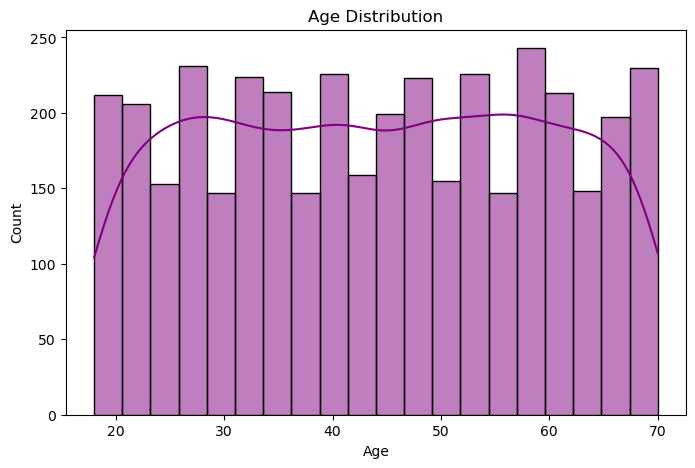

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"],bins=20,kde=True,color="purple")
plt.title('Age Distribution')
plt.show()

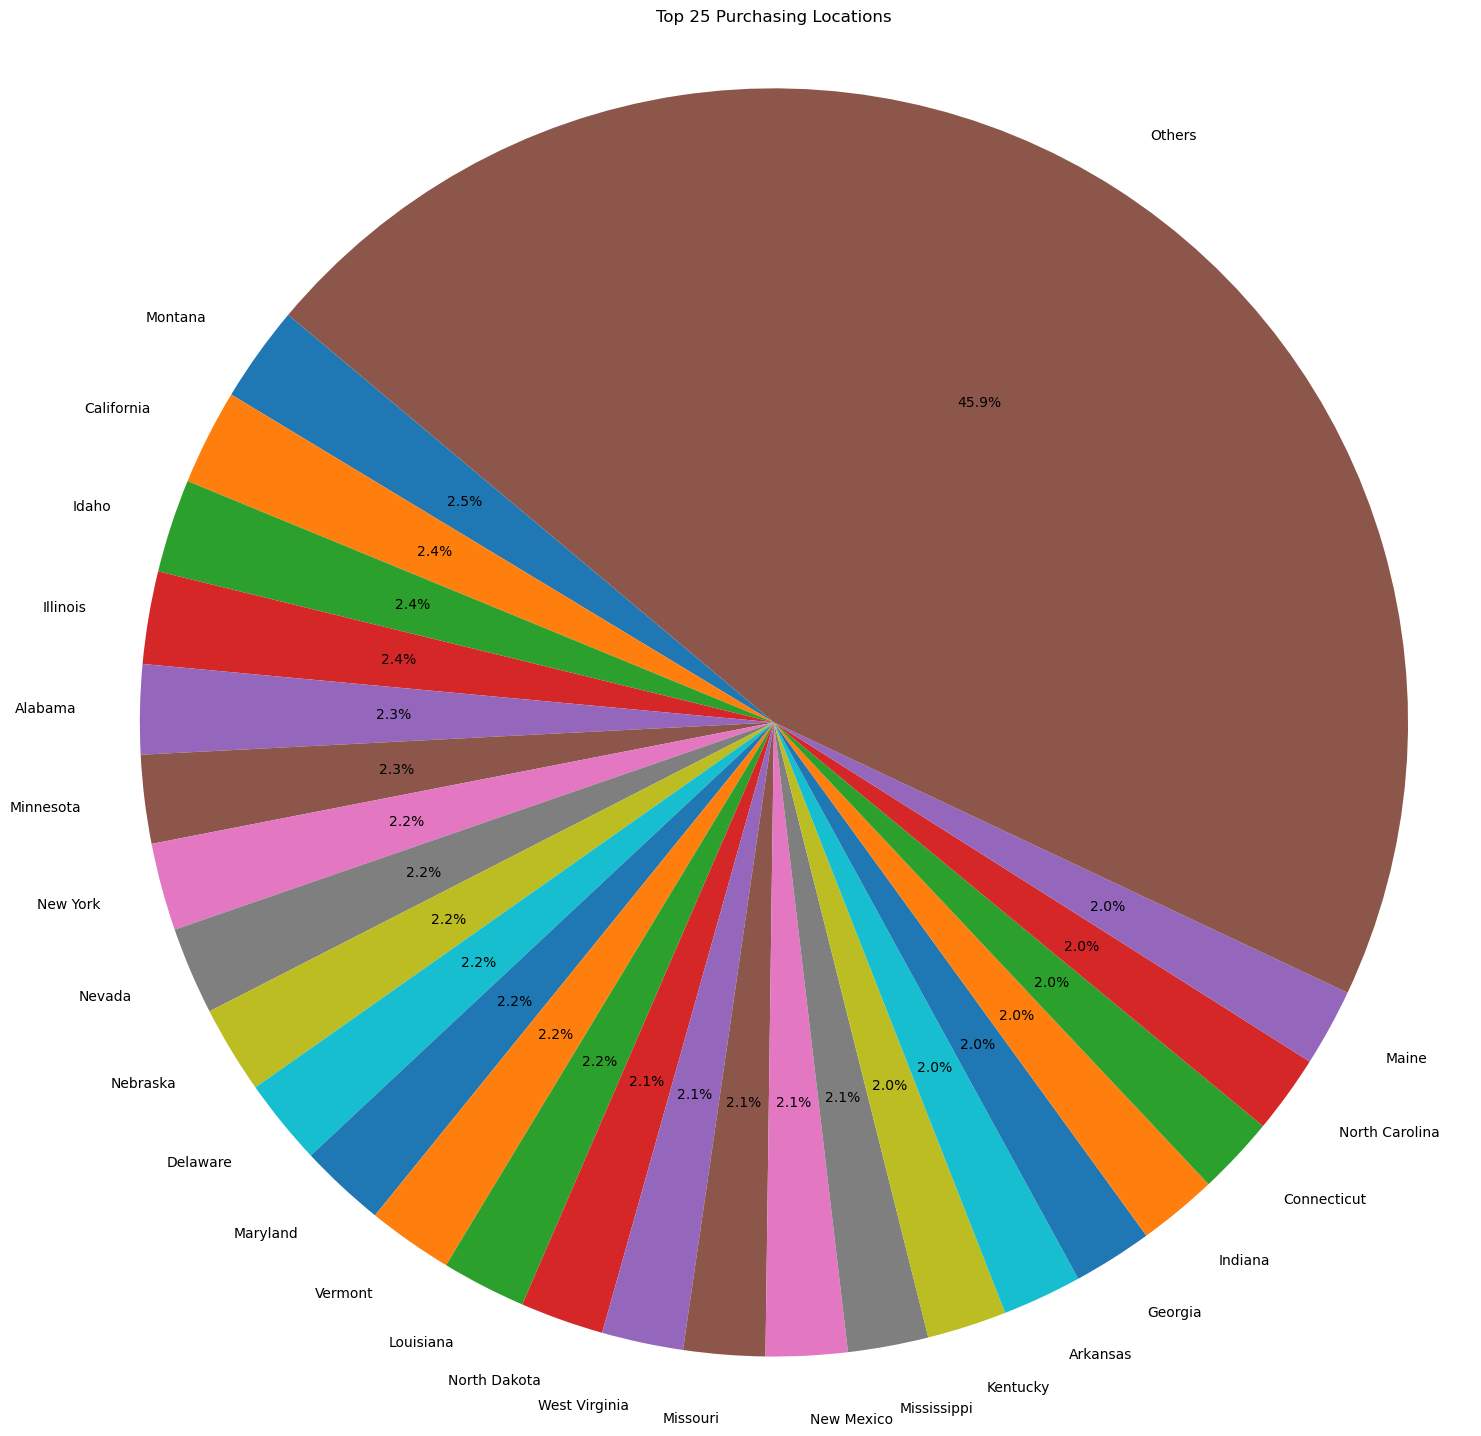

In [265]:
location_counts = df["Location"].value_counts()
top_10 = location_counts[:25]
others = location_counts[25:].sum()
final_counts = pd.concat([top_10, pd.Series({'Others': others})])

# Plot
plt.figure(figsize=(18, 18))
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 25 Purchasing Locations")
plt.axis('equal')
plt.show()


In [190]:
print("Most Frequent Size:", df["Size"].mode().iloc[0])
print("Most Frequent Color:", df["Color"].mode().iloc[0])

Most Frequent Size: M
Most Frequent Color: Olive


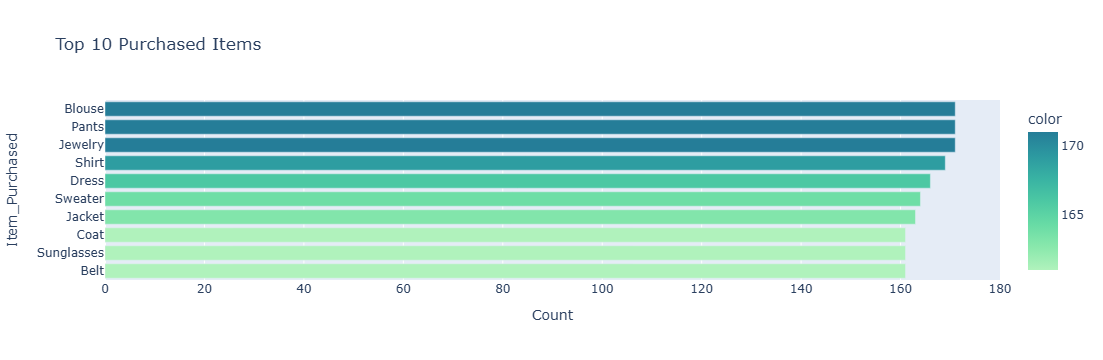

In [83]:
fig = px.bar(top_items, orientation='h', title='Top 10 Purchased Items',
             labels={'value': 'Count', 'index': 'Item Purchased'},
             color=top_items.values, color_continuous_scale='tealgrn')
fig.update_layout(yaxis=dict(autorange='reversed'))
fig.show()

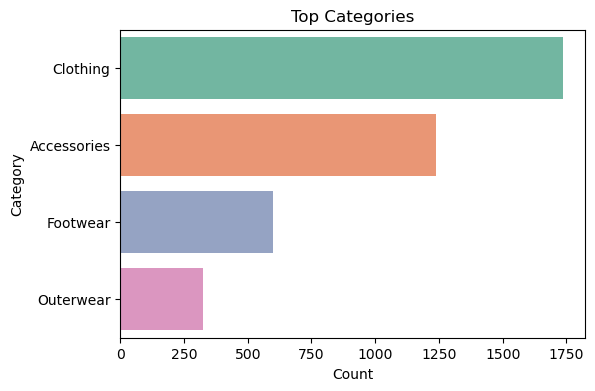

In [74]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, palette='Set2')
plt.title('Top Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

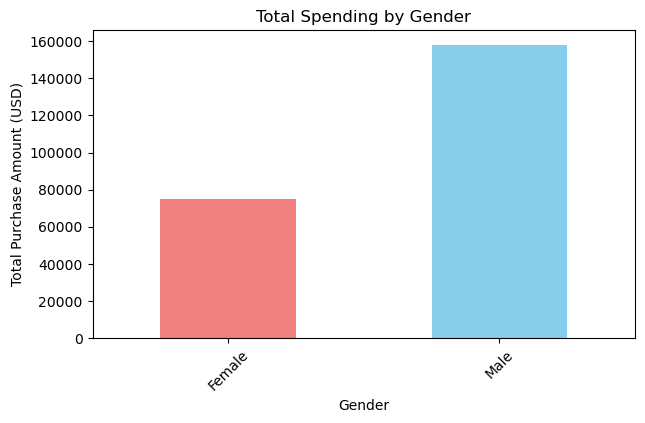

In [195]:
season_spending = df.groupby('Gender')['Purchase_Amount_USD'].sum().sort_values()
plt.figure(figsize=(7,4))
season_spending.plot(kind='bar',color=["lightcoral","skyblue"])
plt.title('Total Spending by Gender')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

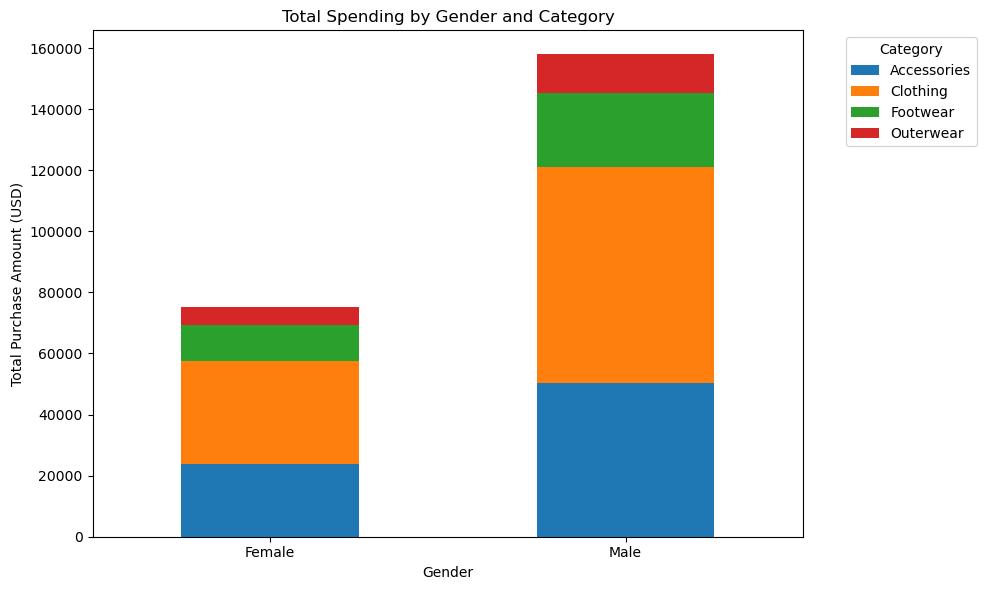

In [240]:
season_category_spending = df.groupby(['Gender', 'Category'])['Purchase_Amount_USD'].sum().unstack()

season_category_spending.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Total Spending by Gender and Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=0)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [228]:
male_avg_spending = df[df["Gender"] == "Male"]["Purchase_Amount_USD"].mean()
female_avg_spending = df[df["Gender"] == "Female"]["Purchase_Amount_USD"].mean()
print(f"Male Average Spending: ${male_avg_spending:.2f}")
print(f"Female Average Spending: ${female_avg_spending:.2f}")

Male Average Spending: $59.54
Female Average Spending: $60.25


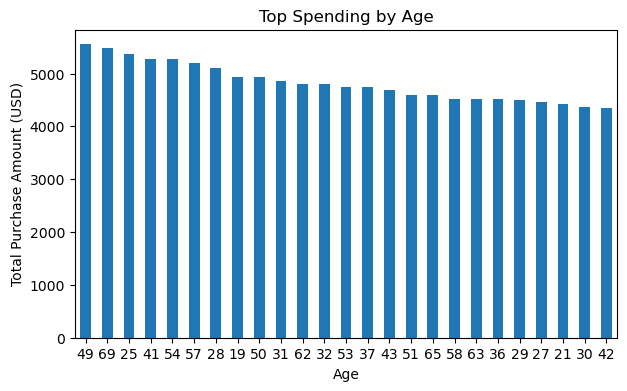

In [216]:
season_spending = df.groupby('Age')['Purchase_Amount_USD'].sum().sort_values(ascending=False).head(25)
plt.figure(figsize=(7,4))
season_spending.plot(kind='bar')
plt.title('Top Spending by Age')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=0)
plt.show()

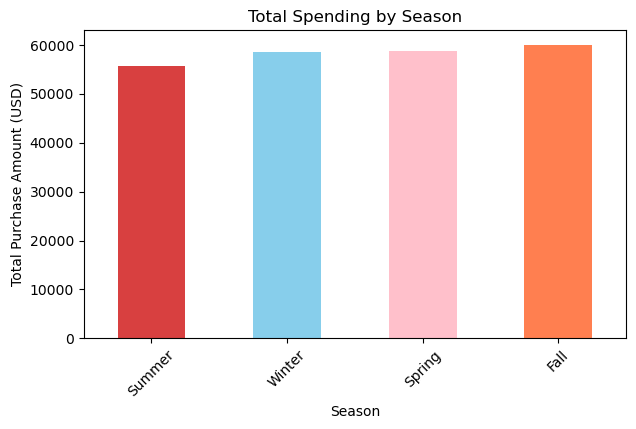

In [89]:
season_spending = df.groupby('Season')['Purchase_Amount_USD'].sum().sort_values()
plt.figure(figsize=(7,4))
season_spending.plot(kind='bar', color=["#D84040","skyblue","pink","coral"])
plt.title('Total Spending by Season')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

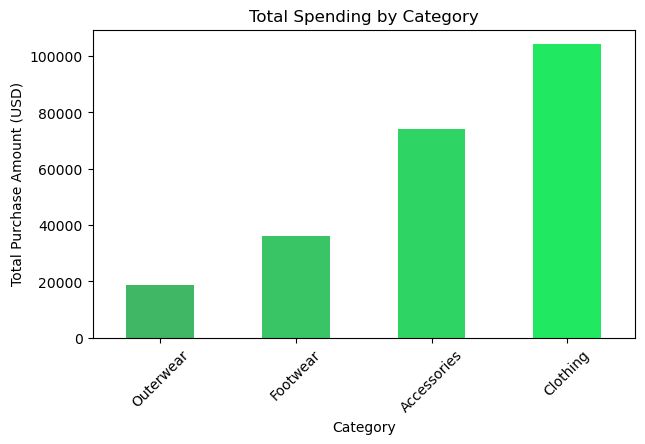

In [112]:
category_data = df.groupby("Category")["Purchase_Amount_USD"].sum().sort_values()
plt.figure(figsize=(7,4))
category_data.plot(kind="bar",color=["#40B765","#39C565","#2FD564","#21E861"])
plt.title('Total Spending by Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

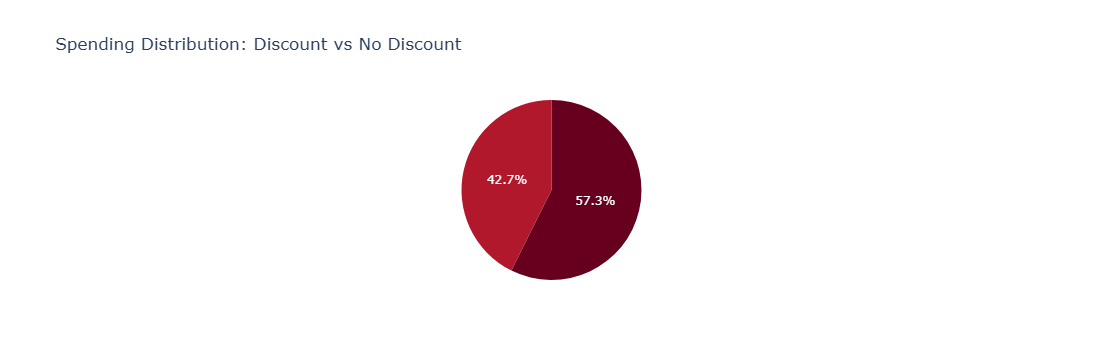

In [121]:
discount_data = df.groupby('Discount_Applied')['Purchase_Amount_USD'].sum().sort_values()
fig = px.pie(discount_data, values='Purchase_Amount_USD',
             title='Spending Distribution: Discount vs No Discount',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

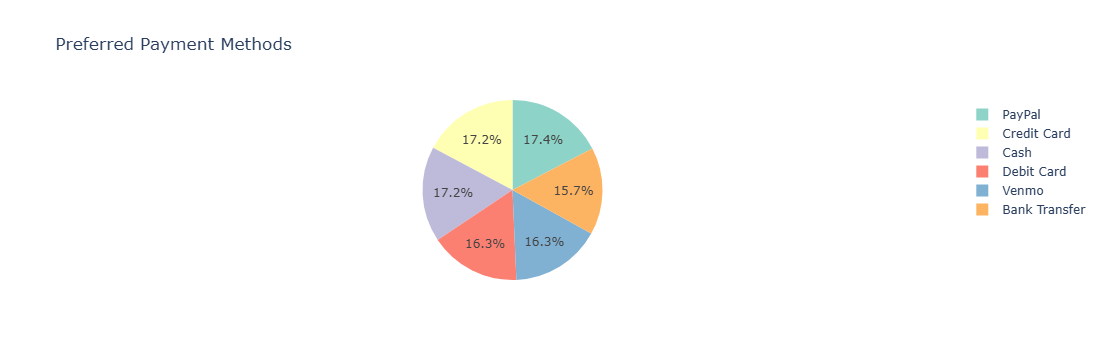

In [126]:
fig = px.pie(df, names='Preferred_Payment_Method', title='Preferred Payment Methods',
             color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()


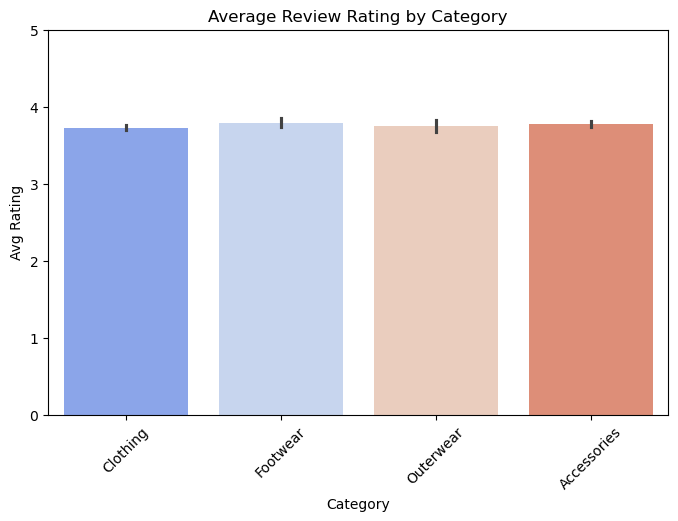

In [124]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Category', y='Review_Rating', palette='coolwarm')
plt.title('Average Review Rating by Category')
plt.ylabel('Avg Rating')
plt.ylim(0, 5)
plt.xticks(rotation=45)
plt.show()


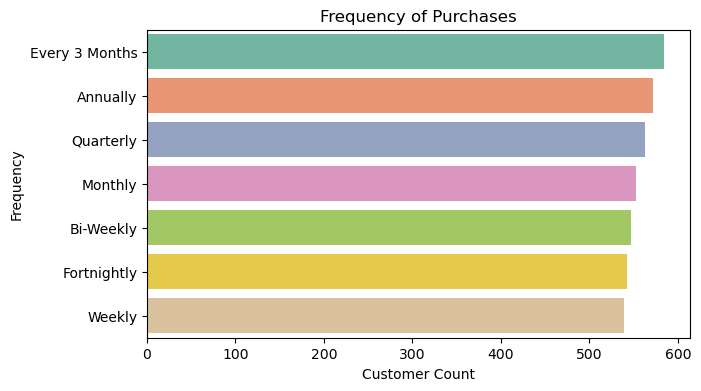

In [127]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, y='Frequency_of_Purchases', order=df['Frequency_of_Purchases'].value_counts().index,
              palette='Set2')
plt.title('Frequency of Purchases')
plt.xlabel('Customer Count')
plt.ylabel('Frequency')
plt.show()


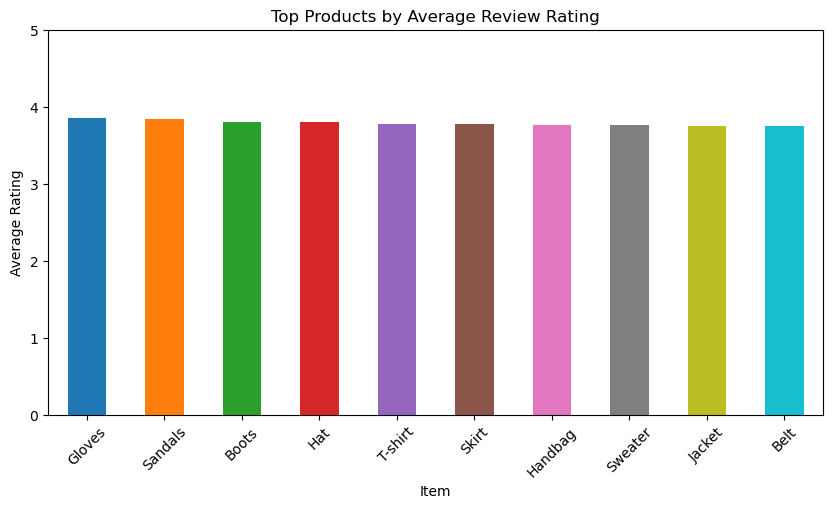

In [261]:
item_rating = df.groupby("Item_Purchased")["Review_Rating"].mean().sort_values(ascending=False)
item_rating.head(10).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Top Products by Average Review Rating")
plt.ylabel("Average Rating")
plt.xlabel("Item")
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.show()

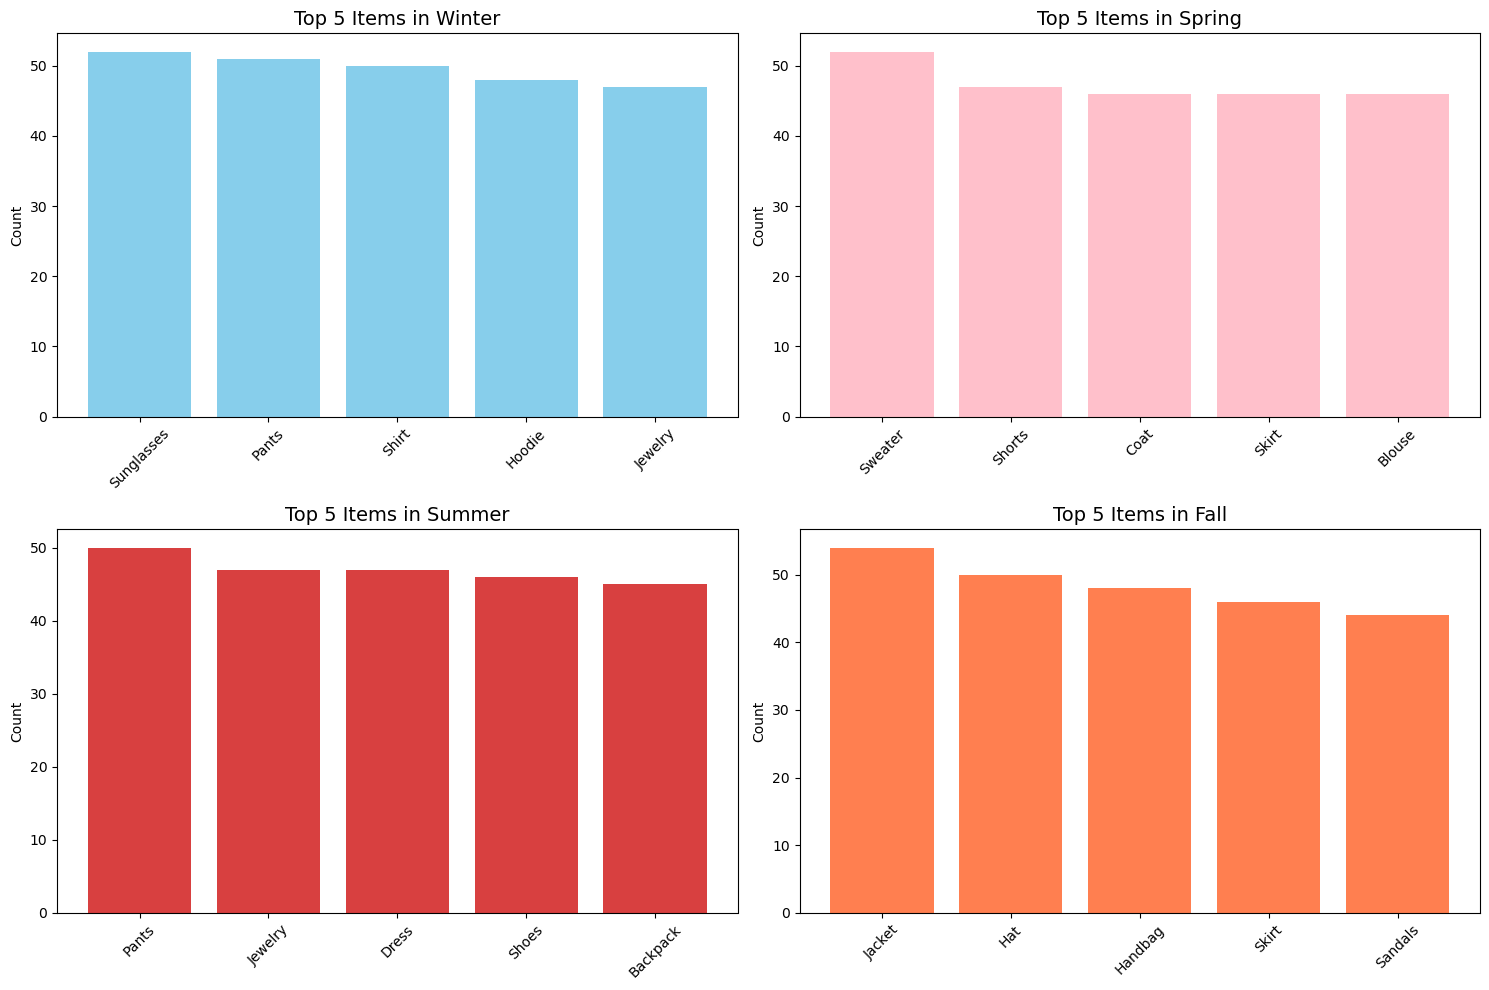

In [259]:
seasons = df['Season'].unique()
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()
colors = ["skyblue","pink","#D84040","coral"] 

for i, season in enumerate(seasons):
    season_items = df[df['Season'] == season]['Item_Purchased'].value_counts().head(5)
    
    axes[i].bar(season_items.index, season_items.values, color=colors[i])
    axes[i].set_title(f'Top 5 Items in {season}', fontsize=14)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


In [133]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
Customer_ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase_Amount_USD,0.011048,-0.010424,1.000000,0.030776,0.008063
Review_Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous_Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


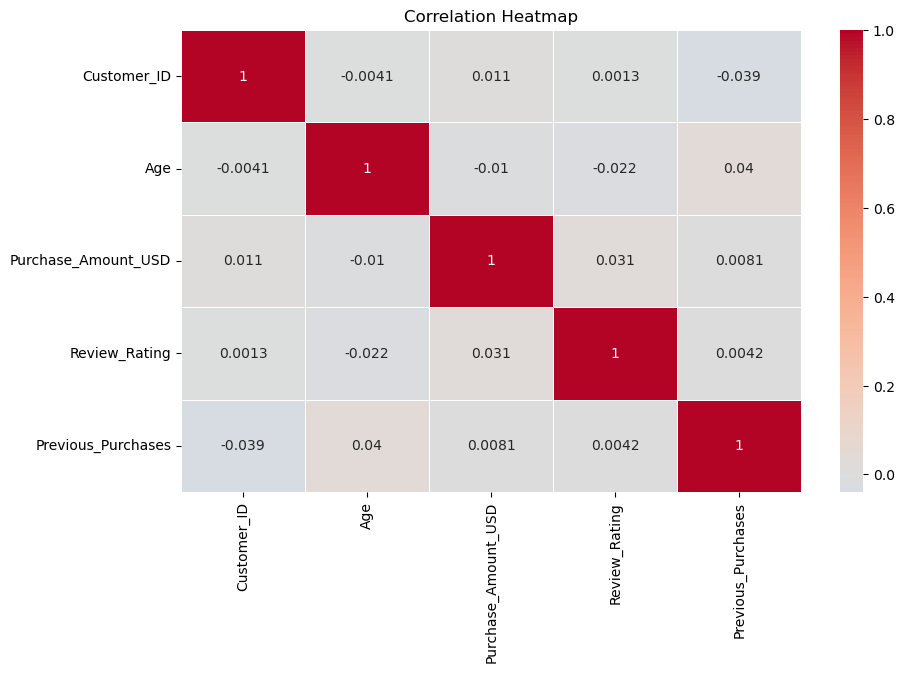

In [140]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### ~ Ahmed Teima